## Quiz

### **Question 1: The Sigmoid Function**
Which of the following statements about the sigmoid function used in logistic regression is **true**?

A. It outputs values that range from $-\infty$ to $+\infty$.  
B. It is used to map predicted values into probabilities between 0 and 1.  
C. It is defined as $S(x) = \frac{x}{1 + x}$.  
D. It cannot be used for binary classification problems.  

**Correct Answer:** B
---

### **Question 2: Difference Between Logistic and Linear Regression**
What is the primary difference between logistic regression and linear regression?

A. Logistic regression predicts continuous outcomes, while linear regression predicts probabilities.  
B. Logistic regression uses a sigmoid function to map predictions, while linear regression predicts directly on a continuous scale.  
C. Linear regression uses a log-likelihood function, while logistic regression uses least-squares error.  
D. Logistic regression only works for categorical df, while linear regression works for numerical df.  

**Correct Answer:** B

---

### **Question 3: Log-Likelihood Measure**
In logistic regression, the log-likelihood function is used to:

A. Minimize the sum of squared residuals.  
B. Maximize the probability of observing the given data under the model.  
C. Calculate the correlation between dependent and independent variables.  
D. Estimate the variance of the residuals.  

**Correct Answer:** B

---

### **Question 4: Odds and Log-Odds**
Which of the following best describes the relationship between odds and log-odds in logistic regression?

A. Odds are probabilities, and log-odds are their exponential values.  
B. Odds are the ratio of the probability of success to failure, and log-odds are the natural logarithm of this ratio.  
C. Log-odds are probabilities scaled between 0 and 1.  
D. Odds are the predicted class label, while log-odds are the probability of class 1.  

**Correct Answer:** B

---

### **Question 5: Interpreting b Coefficients**
In logistic regression, the b coefficient of an independent variable represents:

A. The change in the predicted probability for a one-unit increase in the independent variable.  
B. The change in the log-odds of the dependent variable for a one-unit increase in the independent variable.  
C. The slope of the decision boundary in the logistic model.  
D. The correlation coefficient between the independent and dependent variables.  

**Correct Answer:** B


## Coding
A psychologist was interested in whether children’s understanding of display rules can be predicted from their age, and whether the child possesses a theory of mind. A display rule is a convention of displaying an appropriate emotion in a given situation. For example, if you receive a Christmas present that you don’t like, the appropriate emotional display is to smile politely and say ‘Thank you, Auntie Kate, I’ve always wanted a rotting cabbage’. The inappropriate emotional display is to start crying and scream ‘Why did you buy me a rotting cabbage, you selfish old bag?’ Using appropriate display rules has been linked to having a theory of mind (the ability to understand what another person might be thinking). To test this theory, children were given a false belief task (a task used to measure whether someone has a theory of mind), a display rule task (which they could either pass or fail) and their age in months was measured. The data are in Display. 

> ### Exercise 
> 
> In this process assessment you will run a logistic regression to see whether possession of display rule understanding (did the child pass the test? – yes/no) can be predicted from possession of a theory of mind (did the child pass the false belief task? – yes/no), age in months and their interaction.

**Task 1: Data Exploration and Preparation**  
- Load the dataset (`Display`) and familiarize yourself with its structure.
- Plot key variables:
  - **Display Rule Understanding** (pass/fail).
  - **Theory of Mind** (pass/fail).
  - **Age in Months**.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [12]:
df = pd.read_csv('/Users/olisa/Lis/data_sci/week8/process5/data/Display.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      70 non-null     int64 
 1   fb       70 non-null     object
 2   display  70 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


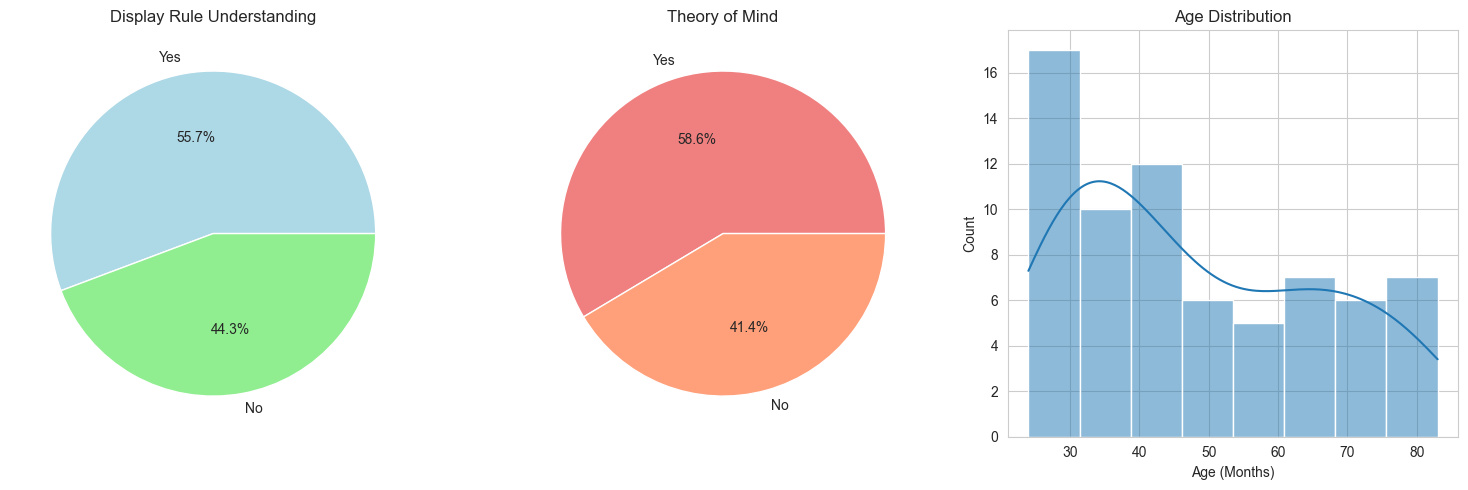

In [ ]:
plt.figure(figsize=(15,5))

# Display Rule Understanding Distribution
plt.subplot(131)
df['display'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Display Rule Understanding')
plt.ylabel('')

# Theory of Mind Distribution
plt.subplot(132)
df['fb'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightsalmon'])
plt.title('Theory of Mind')
plt.ylabel('')

# Age Distribution
plt.subplot(133)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Months)')

plt.tight_layout()
plt.show()


---
**Task 2: Create Dummy Variables**  
- Convert categorical variables, such as **Display Rule Understanding** and **Theory of Mind**, into dummy variables if necessary.
- Ensure all variables are formatted appropriately for a logistic regression model (e.g., coding pass/fail as 1/0).

In [17]:
# Convert categorical variables to dummy/binary
le = LabelEncoder()
df['display_binary'] = le.fit_transform(df['display'])
df['fb_binary'] = le.fit_transform(df['fb'])

# Verification
print(df.head())
df.dtypes

   age  fb display  display_binary  fb_binary
0   24  No      No               0          0
1   26  No      No               0          0
2   30  No      No               0          0
3   31  No      No               0          0
4   36  No      No               0          0


age                int64
fb                object
display           object
display_binary     int64
fb_binary          int64
dtype: object

---

**Task 3: Build the Logistic Regression Model**  
- Set up a logistic regression model to predict **Display Rule Understanding** based on:
  - **Theory of Mind** (dummy variable),
  - **Age in Months** (continuous variable),
- Fit the model to the data and extract the regression coefficients.

**Hint:** Several statistical packages automatically encode categorical variables into dummy variables so that you don't have to manually dummify categorical variables. In this Task, you don't have to use the dummy variables created in the previous Task. I recommend using one of the statistical packages and functions that we used in class. 


In [ ]:
# Prepare features and target
X = df[['age', 'fb_binary']]
y = df['display_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Model Evaluation
print("\nModel Coefficients:")
print(f"Intercept: {log_model.intercept_[0]:.4f}")
print(f"Age Coefficient: {log_model.coef_[0][0]:.4f}")
print(f"Theory of Mind Coefficient: {log_model.coef_[0][1]:.4f}")

# Predict and evaluate
y_pred = log_model.predict(X_test)



Model Coefficients:
Intercept: -3.6562
Age Coefficient: 0.0718
Theory of Mind Coefficient: 1.2937



---

**Task 4: Model Interpretation**  
- Interpret the coefficients for:
  - **Theory of Mind**: What does this predictor suggest about display rule understanding?
  - **Age in Months**: How does age affect display rule understanding?


Theory of Mind Coefficient (1.2937):
This positive coefficient suggests that having a theory of mind is associated with a higher likelihood of understanding display rules. Specifically: When a child has a theory of mind, the log-odds of understanding display rules increase by 1.2937
This means children with a theory of mind are more likely to understand and apply display rules compared to those without.

Age Coefficient (0.0718):
The positive coefficient indicates that as age increases: The log-odds of understanding display rules slightly increase
For each additional month of age, the likelihood of understanding display rules grows modestly. The effect is much less dramatic compared to the theory of mind predictor

  
---

**Task 5: Model Evaluation**  
- Evaluate the model’s fit and significance:
  - Commment on the overall model fit when comparing the Log-Likelihood and the LL-Null.
  - Assess the significance of individual predictors (e.g., using p-values or confidence intervals).
  - Draw conclusions about whether **Theory of Mind** and **Age** significantly predict display rule understanding and the direction of the relationship.


In [ ]:
# Prepare data
X_with_constant = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X_with_constant).fit()

# Model evaluation
print("Model Summary:")
print(model.summary())

print("\nCoefficient Analysis:")
coef_table = model.summary2().tables[1]
print(coef_table)

# Likelihood Ratio Test
# Compute Null Log-Likelihood
y_mean = model.model.endog.mean()  # Mean of dependent variable (probability of success)
null_ll = np.sum(model.model.endog * np.log(y_mean) + 
                 (1 - model.model.endog) * np.log(1 - y_mean))

# Full model log-likelihood
full_ll = model.llf  # Log-likelihood of the fitted model

# Likelihood Ratio Test Statistic
lr_test_stat = -2 * (null_ll - full_ll)
print("\nLikelihood Ratio Test:")
print(f"Log-Likelihood (Null Model): {null_ll}")
print(f"Log-Likelihood (Full Model): {full_ll}")
print(f"LR Test Statistic: {lr_test_stat}")


Optimization terminated successfully.
         Current function value: 0.483976
         Iterations 6
Model Summary:
                           Logit Regression Results                           
Dep. Variable:         display_binary   No. Observations:                   70
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.2951
Time:                        13:19:11   Log-Likelihood:                -33.878
converged:                       True   LL-Null:                       -48.062
Covariance Type:            nonrobust   LLR p-value:                 6.919e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4958      0.918     -2.718      0.007      -4.295      -0.696
age           

Log-Likelihood (Null Model): -48.062
Log-Likelihood (Full Model): -33.878

Likelihood Ratio Test Statistic: 28.37 suggests a substantial improvement in the model's log-likelihood when predictors (age and fb_binary) are included.

LR Test P-value: 6.919×10^−7
 The very small p-value indicates that the full model is significantly better than the null model at explaining the outcome (display rule understanding).

The model provides a good overall fit and demonstrates that the predictors collectively explain a significant portion of the variance in the outcome.

Theory of Mind (fb_binary) p-Value: 0.002	
Highly significant (p < 0.05). Strong evidence that Theory of Mind predicts display rule understanding.

Age p-Value: 0.136
Not significant (p > 0.05). Weak evidence for an age effect on display rule understanding.

Confidence Intervals:
Age: Confidence interval (-0.01 to 0.074) includes 0, indicating the effect is not statistically significant.
Theory of Mind: Confidence interval (0.801 to 3.529) does not include 0, confirming a significant positive effect.

The p-values and confidence intervals both corroborate each other.

Direction of Relationships:

Theory of Mind (fb_binary): Positive coefficient (+2.165): Having Theory of Mind increases the likelihood of passing the display rule understanding test. This suggests that participants with Theory of Mind are approximately (Odds Ratio=e ^ 2.165≈8.7) 8.7 times more likely to pass display rule understanding. 

Age: Positive coefficient (+0.0319): A slight increase in age correlates with higher odds of passing the test, but the effect is not statistically significant.



The evaluation shows that while Theory of Mind significantly and strongly predicts display rule understanding, age does not have a statistically significant effect. Additionally, the model as a whole is robust and provides meaningful insights into the data, as supported by the likelihood ratio test and the overall fit.